# Классификация

In [65]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import seaborn as sns

from tqdm import tqdm
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

sns.set_theme()

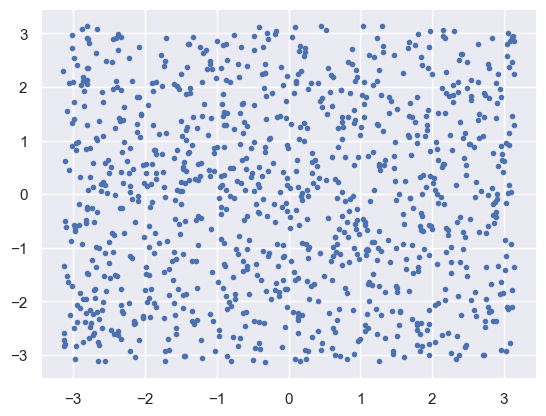

In [77]:
x = 2 * np.pi * (0.5 - torch.rand(1000))
y = 2 * np.pi * (0.5 - torch.rand(1000))

plt.clf()
plt.plot(x.numpy(), y.numpy(), '.', c='b')
plt.show()

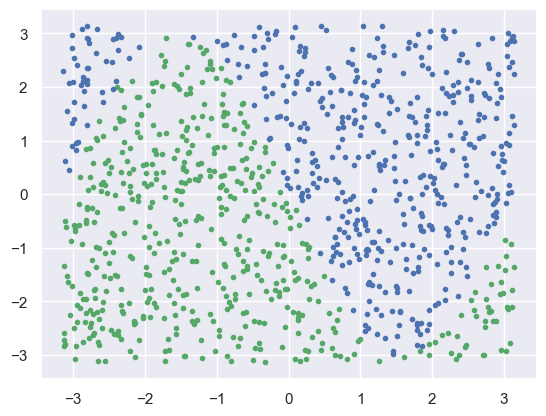

In [78]:
# f  = lambda x: -3 * x - 3
f  = lambda x: -3 * np.sin(x)

z  = (np.sign(y - f(x)) + 1) / 2
i1 = [i for i, x in enumerate(z) if x <= 0]
i2 = [i for i, x in enumerate(z) if x > 0]

plt.clf()
plt.plot(x.numpy()[i1], y.numpy()[i1], '.', c='g')
plt.plot(x.numpy()[i2], y.numpy()[i2], '.', c='b')
plt.show()

In [79]:
X = x.reshape(-1, 1)
y = y.reshape(-1, 1)
I = torch.cat((X, y), dim=1)
O = z.reshape(-1, 1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(I, O, test_size=0.2, stratify=O)

In [81]:
class NeuralNetworkClassifier(nn.Module):
    def __init__(self, hidden_neurons):
        super(NeuralNetworkClassifier, self).__init__()
        
        self.fc1 = torch.nn.Linear(2, hidden_neurons)
        self.ac1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(hidden_neurons, 1)
        self.ac2 = torch.nn.Sigmoid()
        
        self.epoch_metrics = []

    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        
        return x
    
    def fit(self, x, y, epoch=1000, learning_rate=0.1):
        loss      = nn.BCELoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate)
        
        for ep_ in tqdm(range(epoch)):
            optimizer.zero_grad()
            y_pred   = self.forward(x)
            loss_val = loss(y_pred, y)
            loss_val.backward()
            optimizer.step()
            
            if not (ep_ + 1) % (epoch // 3):
                y_test_pred = self.forward(X_test).detach().numpy()
                self.epoch_metrics.append([ep_, roc_auc_score(y_test.reshape(-1), y_test_pred)])
        
        for el in self.epoch_metrics:
            print(f'Epoch: {el[0]}, Metric: {el[1]}')
        
    def predict(self, x):
        return self.forward(x)

In [82]:
%%time
model = NeuralNetworkClassifier(300)
model.fit(X_train, y_train)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 342.04it/s]

Epoch: 332, Metric: 1.0
Epoch: 665, Metric: 1.0
Epoch: 998, Metric: 1.0
CPU times: total: 36.2 s
Wall time: 2.93 s


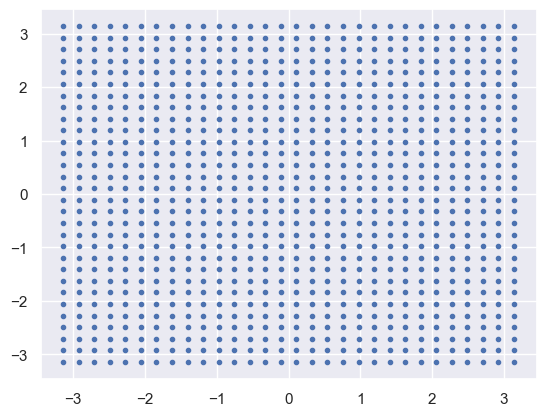

In [72]:
Xs = torch.linspace(-np.pi, np.pi, steps=30)
ys = torch.linspace(-np.pi, np.pi, steps=30)
Xs_test, ys_test = torch.meshgrid(Xs, ys, indexing='xy')

plt.clf()
plt.plot(Xs_test.numpy(), ys_test.numpy(), '.', c='b')
plt.show()

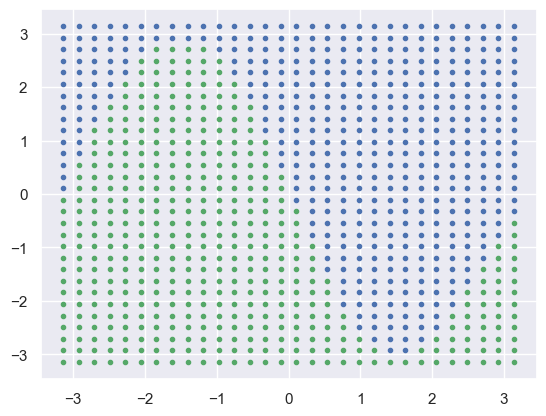

In [83]:
Xs_test = torch.flatten(Xs_test).reshape(-1, 1)
ys_test = torch.flatten(ys_test).reshape(-1, 1)
I_test  = torch.cat((Xs_test, ys_test), dim=1)
O_test  = model.forward(I_test)

i1net   = [i for i, x in enumerate(O_test) if x <= 0.5] 
i2net   = [i for i, x in enumerate(O_test) if x > 0.5]

plt.clf()
plt.plot(Xs_test.detach().numpy()[i1net], ys_test.detach().numpy()[i1net], '.', c='g')
plt.plot(Xs_test.detach().numpy()[i2net], ys_test.detach().numpy()[i2net], '.', c='b')
plt.show()

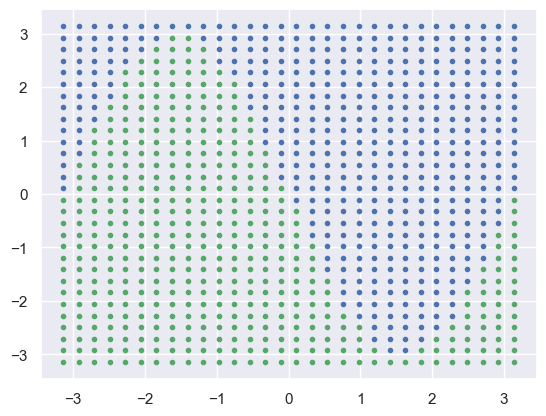

In [84]:
z  = np.sign(ys_test - f(Xs_test))
i1 = [i for i, x in enumerate(z) if x <= 0]
i2 = [i for i, x in enumerate(z) if x > 0]

plt.clf()
plt.plot(Xs_test.detach().numpy()[i1], ys_test.detach().numpy()[i1], '.', c='g')
plt.plot(Xs_test.detach().numpy()[i2], ys_test.detach().numpy()[i2], '.', c='b')
plt.show()

In [85]:
error = len(set(i1).symmetric_difference(set(i1net)))
print("Wrong answers:", error)

Wrong answers: 12
